### PIL image processing

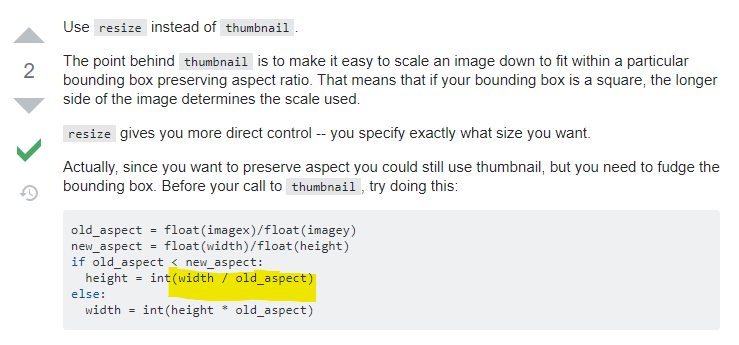

https://stackoverflow.com/questions/4321290/how-do-i-make-pil-take-into-account-the-shortest-side-when-creating-a-thumbnail

Center crop teh PIL image:

https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil

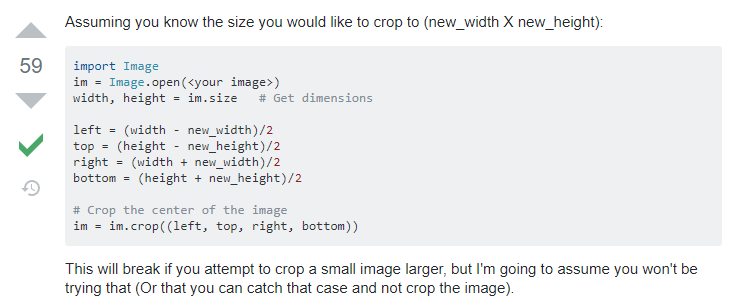

https://stackoverflow.com/questions/52346152/crop-the-center-of-an-image

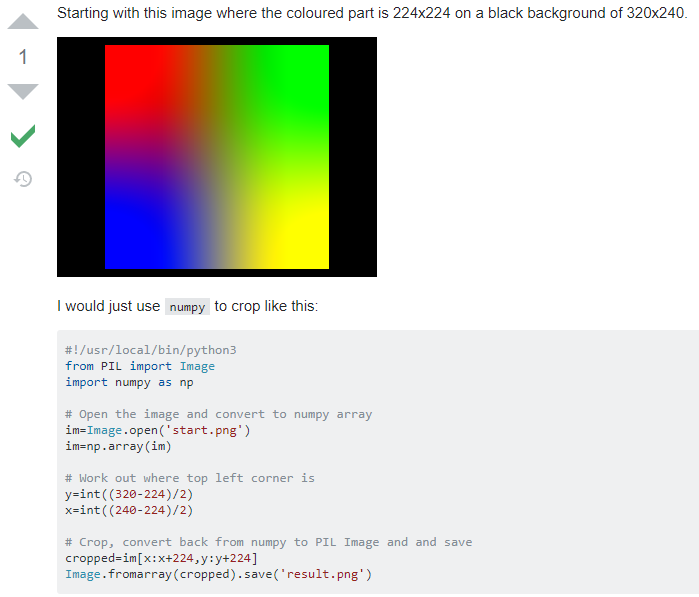

In [7]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import time
import numpy as np
from PIL import Image

In [5]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    
    crop_size = 224
    new_width = 256

    # Resize with shortest side 256 and maintain aspect ratio
    width, height = image.size
    orig_ar = (width / height)    
    new_height = (new_width / orig_ar)
    image.thumbnail((new_width, new_height), Image.ANTIALIAS)
    w1, h1 = image.size

    # center crop
    left = int((new_width - crop_size) / 2)
    top = int((new_height - crop_size) / 2)
    right = int((new_width + crop_size) / 2)
    bottom = int((new_height + crop_size) / 2)
    image = image.crop((left, top, right, bottom)) 
    w2, h2 = image.size
    
    print("original dim  : ", width, height)
    print("new_height : ", new_height)
    print("After thumbnail : ", w1, h1)
    print("center_crop : ", left, top, right, bottom)    
    print("After crop : ", w2, h2)
    #image.show()
    
    
    # 3. PIL to nparray - 0-255
    np_image = np.array(image)
    print("\n numpy image : ", np_image.min(), np_image.max(), np_image.dtype)
    # scale : 0 to 1 range
    np_image = np_image / 255
    print("\n numpy image : ", np_image.min(), np_image.max(), np_image.dtype)

    # 4. Normalize the image
    print(" \n image shape : ", np_image.shape)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    #print("normalized numpy image : ", np_image.mean(), np_image.std(), np_image.dtype)

    # 5. re-order color channels
    out_image = np.transpose(np_image, (2, 0, 1))
    print(" \n image shape : ", out_image.shape)
    
    return out_image

In [3]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

original dim  :  500 601
new_height :  307.712
After thumbnail :  256 308
center_crop :  16 41 240 265
After crop :  224 224

 numpy image :  0 255 uint8

 numpy image :  0.0 1.0 float64
 
 image shape :  (224, 224, 3)
 
 image shape :  (3, 224, 224)


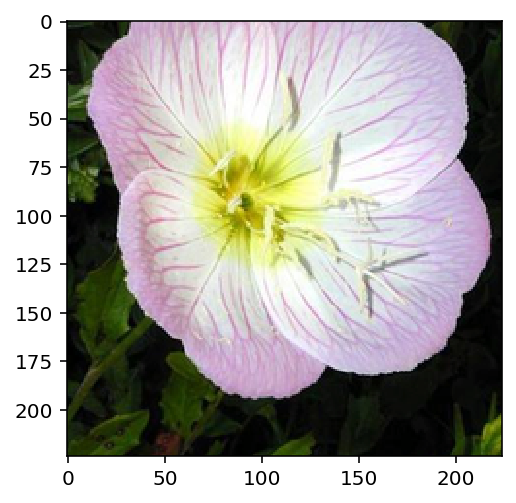

In [8]:
# test  - process_image()
from PIL import Image

image_path = r'C:\Users\janan\.pytorch\flower_data\test\1' + '\image_06743.jpg'
image_path = r"C:\Learning\Nanodegree\pytorch\image_06743.jpg"
image = Image.open(image_path)

image_ndarray = process_image(image)

image_torch = torch.from_numpy(image_ndarray)

imshow(image_torch)